References:
    
* [ONS Code History Database](http://geoportal.statistics.gov.uk/datasets?q=Code+History+Database&sort_by=name&sort_order=asc)
* [Boundaries](http://geoportal.statistics.gov.uk/datasets/clinical-commissioning-groups-april-2017-full-clipped-boundaries-in-england-v4)
* [CCG to LOSA lookups](http://geoportal.statistics.gov.uk/datasets/lsoa-2011-to-clinical-commissioning-groups-to-sustainability-and-transformation-partnerships-april-2017-lookup-in-england)
* [GP Practice Details](https://digital.nhs.uk/organisation-data-service/data-downloads/gp-data)
* [NHS Postcode Directory Centroids](http://geoportal.statistics.gov.uk/datasets/675f07b52292428992709d0af98d86d9_0)

    


In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
headers = [
    'code','name','postcode','status_code','ccg','setting']
epraccur = pd.read_csv("epraccur_may_2017.csv", names=headers, usecols=[0,1,9,12,23,25])

In [3]:
epraccur.head()

,code,name,postcode,status_code,ccg,setting
0,A81001,THE DENSHAM SURGERY,TS18 1HU,A,00K,4
1,A81002,QUEENS PARK MEDICAL CENTRE,TS18 2AW,A,00K,4
2,A81003,VICTORIA MEDICAL PRACTICE,TS26 8DB,D,00K,4
3,A81004,WOODLANDS ROAD SURGERY,TS1 3BE,A,00M,4
4,A81005,SPRINGWOOD SURGERY,TS14 7DJ,A,00M,4


In [4]:
lsoa_lookup = pd.read_csv(
    "LSOA_2011_to_Clinical_Commissioning_Groups_to_Sustainability_and_Transformation_Partnerships_April_2017_Lookup_in_England.csv",
    names=['lsoa','ccg17cd', 'ccg','name'],
    header=0,
    usecols=[0,2,3,4]
)

In [5]:
lsoa_lookup.head()

,lsoa,ccg17cd,ccg,name
0,E01021729,E38000117,06T,NHS North East Essex CCG
1,E01021730,E38000117,06T,NHS North East Essex CCG
2,E01029950,E38000204,07K,NHS West Suffolk CCG
3,E01021731,E38000117,06T,NHS North East Essex CCG
4,E01021732,E38000117,06T,NHS North East Essex CCG


In [6]:
boundaries = gpd.read_file('Clinical_Commissioning_Groups_April_2017_Full_Clipped_Boundaries_in_England_V4.shp')

In [7]:
boundaries.head()

,bng_e,bng_n,ccg17cd,ccg17nm,geometry,lat,long,objectid,st_areasha,st_lengths
0,393990,462191,E38000001,"NHS Airedale, Wharfedale and Craven CCG","POLYGON ((385565.5894845667 483953.6485985344,...",54.055599,-2.093300,1,1.220633e+09,221998.415512
1,597640,140644,E38000002,NHS Ashford CCG,"POLYGON ((606433.5512145269 156322.4880208465,...",51.131001,0.823374,2,5.806172e+08,149424.217436
2,481343,219317,E38000003,NHS Aylesbury Vale CCG,"POLYGON ((472043.0687303017 242900.0443609316,...",51.866501,-0.820020,3,9.790281e+08,278005.394431
3,547758,185109,E38000004,NHS Barking and Dagenham CCG,(POLYGON ((548883.1758077047 190820.2720849307...,51.545502,0.129493,4,3.609104e+07,40663.923224
4,523471,191753,E38000005,NHS Barnet CCG,"POLYGON ((525815.8440469442 198211.9265971188,...",51.611099,-0.218220,5,8.673644e+07,50837.784444


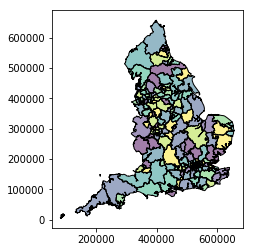

In [41]:
boundaries.plot()

In [7]:
postcode_lookup = pd.read_csv(
    "NHS_Postcode_Directory_Latest_Centroids.csv",
    usecols=[0,1,2,3,4,19]
)


In [8]:
ccg_lookup = lsoa_lookup[['ccg17cd', 'ccg']].drop_duplicates().set_index('ccg17cd')
boundaries.set_index('ccg17cd', inplace=True)
boundaries_with_ccg = boundaries.join(ccg_lookup)

In [10]:
boundaries_with_ccg.head()

,bng_e,bng_n,ccg17nm,geometry,lat,long,objectid,st_areasha,st_lengths,ccg
ccg17cd,,,,,,,,,,
E38000001,393990,462191,"NHS Airedale, Wharfedale and Craven CCG","POLYGON ((385565.5894845667 483953.6485985344,...",54.055599,-2.093300,1,1.220633e+09,221998.415512,02N
E38000002,597640,140644,NHS Ashford CCG,"POLYGON ((606433.5512145269 156322.4880208465,...",51.131001,0.823374,2,5.806172e+08,149424.217436,09C
E38000003,481343,219317,NHS Aylesbury Vale CCG,"POLYGON ((472043.0687303017 242900.0443609316,...",51.866501,-0.820020,3,9.790281e+08,278005.394431,10Y
E38000004,547758,185109,NHS Barking and Dagenham CCG,(POLYGON ((548883.1758077047 190820.2720849307...,51.545502,0.129493,4,3.609104e+07,40663.923224,07L
E38000005,523471,191753,NHS Barnet CCG,"POLYGON ((525815.8440469442 198211.9265971188,...",51.611099,-0.218220,5,8.673644e+07,50837.784444,07M


In [143]:
#postcode_lookup = postcode_lookup.set_index('pcd2')
epraccur_with_centroids = epraccur.merge(postcode_lookup, left_on='postcode', right_on='pcds', how='left')
#epraccur_with_centroids = postcode_lookup.join(epraccur, how='left', on='postcode', rsuffix='postcode')

In [144]:
epraccur_with_centroids.head()

,code,name,postcode,status_code,ccg_x,setting,X,Y,objectid,pcd2,pcds,ccg_y
0,A81001,THE DENSHAM SURGERY,TS18 1HU,A,00K,4,-1.318999,54.561637,2361079.0,TS18 1HU,TS18 1HU,00K
1,A81002,QUEENS PARK MEDICAL CENTRE,TS18 2AW,A,00K,4,-1.313893,54.569175,2361300.0,TS18 2AW,TS18 2AW,00K
2,A81003,VICTORIA MEDICAL PRACTICE,TS26 8DB,D,00K,4,-1.217613,54.685250,2369245.0,TS26 8DB,TS26 8DB,00K
3,A81004,WOODLANDS ROAD SURGERY,TS1 3BE,A,00M,4,-1.232269,54.571822,2354363.0,TS1 3BE,TS1 3BE,00M
4,A81005,SPRINGWOOD SURGERY,TS14 7DJ,A,00M,4,-1.055459,54.532610,2358498.0,TS14 7DJ,TS14 7DJ,00M


In [145]:
epraccur_with_centroids = epraccur_with_centroids[epraccur_with_centroids.X.notnull()]
epraccur_with_centroids['geometry'] = epraccur_with_centroids.apply(lambda z: Point(z.X, z.Y), axis=1)
epraccur_with_centroids = gpd.GeoDataFrame(epraccur_with_centroids)
epraccur_with_centroids.head()

,code,name,postcode,status_code,ccg_x,setting,X,Y,objectid,pcd2,pcds,ccg_y,geometry
0,A81001,THE DENSHAM SURGERY,TS18 1HU,A,00K,4,-1.318999,54.561637,2361079.0,TS18 1HU,TS18 1HU,00K,POINT (-1.318998500227571 54.56163711943564)
1,A81002,QUEENS PARK MEDICAL CENTRE,TS18 2AW,A,00K,4,-1.313893,54.569175,2361300.0,TS18 2AW,TS18 2AW,00K,POINT (-1.313892735075778 54.56917529964024)
2,A81003,VICTORIA MEDICAL PRACTICE,TS26 8DB,D,00K,4,-1.217613,54.685250,2369245.0,TS26 8DB,TS26 8DB,00K,POINT (-1.217613081180904 54.68524956577383)
3,A81004,WOODLANDS ROAD SURGERY,TS1 3BE,A,00M,4,-1.232269,54.571822,2354363.0,TS1 3BE,TS1 3BE,00M,POINT (-1.232269492241478 54.57182217067488)
4,A81005,SPRINGWOOD SURGERY,TS14 7DJ,A,00M,4,-1.055459,54.532610,2358498.0,TS14 7DJ,TS14 7DJ,00M,POINT (-1.055459266614189 54.53260970143794)


In [146]:
epraccur_with_centroids.crs = {'init' :'epsg:4326'}
boundaries_with_ccg.crs = {'init' :'epsg:27700'}
epraccur_with_centroids = epraccur_with_centroids.to_crs({'init': 'epsg:27700'})


In [147]:
practices_with_ccg = gpd.sjoin(epraccur_with_centroids, boundaries_with_ccg.reset_index(), how="left")

In [148]:
practices_with_ccg.head()

,code,name,postcode,status_code,ccg_x,setting,X,Y,objectid_left,pcd2,...,ccg17cd,bng_e,bng_n,ccg17nm,lat,long,objectid_right,st_areasha,st_lengths,ccg
0,A81001,THE DENSHAM SURGERY,TS18 1HU,A,00K,4,-1.318999,54.561637,2361079.0,TS18 1HU,...,E38000075,445468.0,523188.0,NHS Hartlepool and Stockton-on-Tees CCG,54.601799,-1.29771,70.0,2.977915e+08,204336.251976,00K
1,A81002,QUEENS PARK MEDICAL CENTRE,TS18 2AW,A,00K,4,-1.313893,54.569175,2361300.0,TS18 2AW,...,E38000075,445468.0,523188.0,NHS Hartlepool and Stockton-on-Tees CCG,54.601799,-1.29771,70.0,2.977915e+08,204336.251976,00K
2,A81003,VICTORIA MEDICAL PRACTICE,TS26 8DB,D,00K,4,-1.217613,54.685250,2369245.0,TS26 8DB,...,E38000075,445468.0,523188.0,NHS Hartlepool and Stockton-on-Tees CCG,54.601799,-1.29771,70.0,2.977915e+08,204336.251976,00K
3,A81004,WOODLANDS ROAD SURGERY,TS1 3BE,A,00M,4,-1.232269,54.571822,2354363.0,TS1 3BE,...,E38000162,461718.0,519597.0,NHS South Tees CCG,54.567799,-1.04695,150.0,2.987713e+08,113083.598127,00M
4,A81005,SPRINGWOOD SURGERY,TS14 7DJ,A,00M,4,-1.055459,54.532610,2358498.0,TS14 7DJ,...,E38000162,461718.0,519597.0,NHS South Tees CCG,54.567799,-1.04695,150.0,2.987713e+08,113083.598127,00M


In [152]:
matching = practices_with_ccg[practices_with_ccg.ccg_x == practices_with_ccg.ccg]
non_matching = practices_with_ccg[practices_with_ccg.ccg_x != practices_with_ccg.ccg]
print "There are %s practices whose inferred CCG (based on location) does not match their stated one" % len(non_matching)

There are 3278 practices whose inferred CCG (based on location) does not match their stated one


In [156]:
# discard uninteresting columns
non_matching = non_matching[['code', 'name', 'postcode', 'status_code', 'ccg_x', 'ccg']]
non_matching.head()

,code,name,postcode,status_code,ccg_x,ccg
74,A81630,FULCRUM MEDICAL PRACTICE,TS5 4EQ,A,112,00M
87,A82011,HARTINGTON STREET MEDICAL PRACTICE,LA14 5SL,C,01H,01K
145,A82619,NELSON STREET SURGERY,LA15 8AF,C,01H,01K
153,A82642,HAWKSHEAD MEDICAL PRACTICE,LA22 0NU,D,01H,01K
240,A83642,RECOVERY CENTRE DURHAM,DH1 3BQ,A,116,00J


In [159]:
non_matching.groupby('status_code').code.agg('count')

status_code
A    2540
C     694
D      43
P       1
Name: code, dtype: int64

In [161]:
non_matching[non_matching.status_code == 'A'].head(20)

,code,name,postcode,status_code,ccg_x,ccg
74,A81630,FULCRUM MEDICAL PRACTICE,TS5 4EQ,A,112,00M
240,A83642,RECOVERY CENTRE DURHAM,DH1 3BQ,A,116,00J
243,A83645,RECOVERY CENTRE CONSETT,DH8 5RL,A,116,00J
357,A86041,SWARLAND AVENUE SURGERY,NE7 7TD,A,99C,13T
466,A91020,LARKHILL MEDICAL CENTRE,SP4 8QY,A,13Q,99N
467,A91021,CRANWELL MEDICAL CENTRE,NG34 8HB,A,13Q,04Q
468,A91022,BOVINGTON MEDICAL CENTRE,BH20 6JA,A,13Q,11J
469,A91023,BULFORD MEDICAL CENTRE,SP4 9AD,A,13Q,99N
470,A91024,CATTERICK MEDICAL CENTRE,DL9 3PZ,A,13Q,03D
471,A91025,PIRBRIGHT MEDICAL CENTRE,GU24 0QQ,A,13Q,09N


In [164]:
epraccur[epraccur.ccg == '13Q'].count()

code           189
name           189
postcode       189
status_code    189
ccg            189
setting        189
dtype: int64

In [165]:
lsoa_lookup[lsoa_lookup.ccg == '13Q'].count()

lsoa       0
ccg17cd    0
ccg        0
name       0
dtype: int64

In [169]:
for group, df in non_matching.groupby('ccg_x'):
    print group

00D
00F
00J
00L
00M
00N
00P
00Q
00W
00X
00Y
01A
01C
01D
01E
01F
01H
01J
01K
01M
01N
01T
01V
01X
02A
02D
02F
02G
02H
02M
02N
02P
02Q
02R
02T
02V
02W
02Y
03A
03C
03G
03J
03K
03M
03N
03Q
03R
03T
03V
03W
03Y
04C
04D
04E
04G
04H
04J
04K
04L
04M
04N
04Q
04V
04X
04Y
05C
05D
05G
05H
05J
05L
05N
05P
05Q
05V
05W
05X
06A
06D
06F
06H
06M
06N
06P
06Q
06V
06W
06Y
07G
07H
07J
07K
07L
07M
07N
07P
07Q
07R
07T
07V
07W
07Y
08C
08D
08E
08F
08H
08J
08K
08L
08M
08Q
08R
08T
08X
08Y
09A
09C
09D
09E
09F
09H
09J
09L
09N
09W
09X
09Y
106
107
109
10A
10C
10D
10E
10H
10J
10K
10M
10N
10R
10V
10W
10X
110
111
112
113
114
116
117
11A
11C
11D
11E
11H
11J
11T
12A
12G
12J
12K
12R
12V
13C
13N
13P
13Q
13R
13T
13V
13W
13X
14A
14E
14F
14G
14H
14K
14L
209
211
212
215
216
218
219
305
310
311
313
319
322
413
414
480
5A3
5A5
5A7
5C1
5C3
5C4
5C9
5CN
5CQ
5D7
5D8
5E1
5EM
5ET
5F1
5F5
5F7
5FE
5FL
5H1
5HG
5HP
5HQ
5HX
5J2
5J9
5JE
5K3
5K5
5K7
5K8
5K9
5KG
5KM
5L1
5LA
5LD
5LE
5LF
5LH
5M1
5M2
5M3
5M6
5M7
5MD
5MX
5N1
5N3
5N4
5N5
5N6
5N7
5N9


In [171]:
non_matching[non_matching.ccg_x == '00X']

,code,name,postcode,status_code,ccg_x,ccg
7693,P81181,KINGSFOLD MEDICAL CENTRE,PR1 9BX,A,00X,01E
7735,P81687,NEW LONGTON SURGERY,PR4 4LU,A,00X,01E
7739,P81692,BEECHES MEDICAL CENTRE,PR4 5AB,A,00X,01E
12641,Y04939,EATING DISORDER SERVICE,PR1 3SG,A,00X,01E


In [172]:
non_matching[non_matching.ccg_x == '00F']

,code,name,postcode,status_code,ccg_x,ccg
312,A85025,1 RAWLING ROAD(THE MEDICAL CENTRE),NE8 4QS,C,00F,13T
314,A85601,BIRTLEY LANE SURGERY,DH3 1AX,C,00F,13T


In [174]:
non_matching[non_matching.ccg_x == '03V']

,code,name,postcode,status_code,ccg_x,ccg
11438,Y03733,NHS CORBY CCG,NN3 6BF,A,03V,04G
11951,Y04248,PRIMECARE CORBY,NN1 5DQ,A,03V,04G


13Q is the "National Commissioning Hub"

00X: NHS CHORLEY AND SOUTH RIBBLE CCG
01E: NHS GREATER PRESTON CCG

00F:  NHS GATESHEAD CCG
13T: NHS NEWCASTLE GATESHEAD CCG

03V: NHS CORBY CCG
04G: NHS NENE CCG

Either practices are assigned to CCG that they're not geographically in; or using centroids of postcodes for locating a practice is not good enough
